# Explore here

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
df_raw = pd.read_csv(url, sep = ";")
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df_raw.shape

(41188, 21)

In [6]:
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ', '_')
        .str.replace(r'\W', '', regex=True)
        .str.lower()
        .str.slice(0, 40), axis=1
    )
    .drop_duplicates()
)


In [7]:
df_interim.columns = df_interim.columns.str.replace('empvarrate', 'emp.var.rate') \
                                      .str.replace('conspriceidx', 'cons.price.idx') \
                                      .str.replace('consconfidx', 'cons.conf.idx')


In [8]:

cat_cols = df_interim.select_dtypes(include=['object']).columns.tolist()
num_cols = df_interim.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Variables categoricas:", cat_cols)
print("Variables numericas:", num_cols)


Variables categoricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Variables numericas: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nremployed']


In [9]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

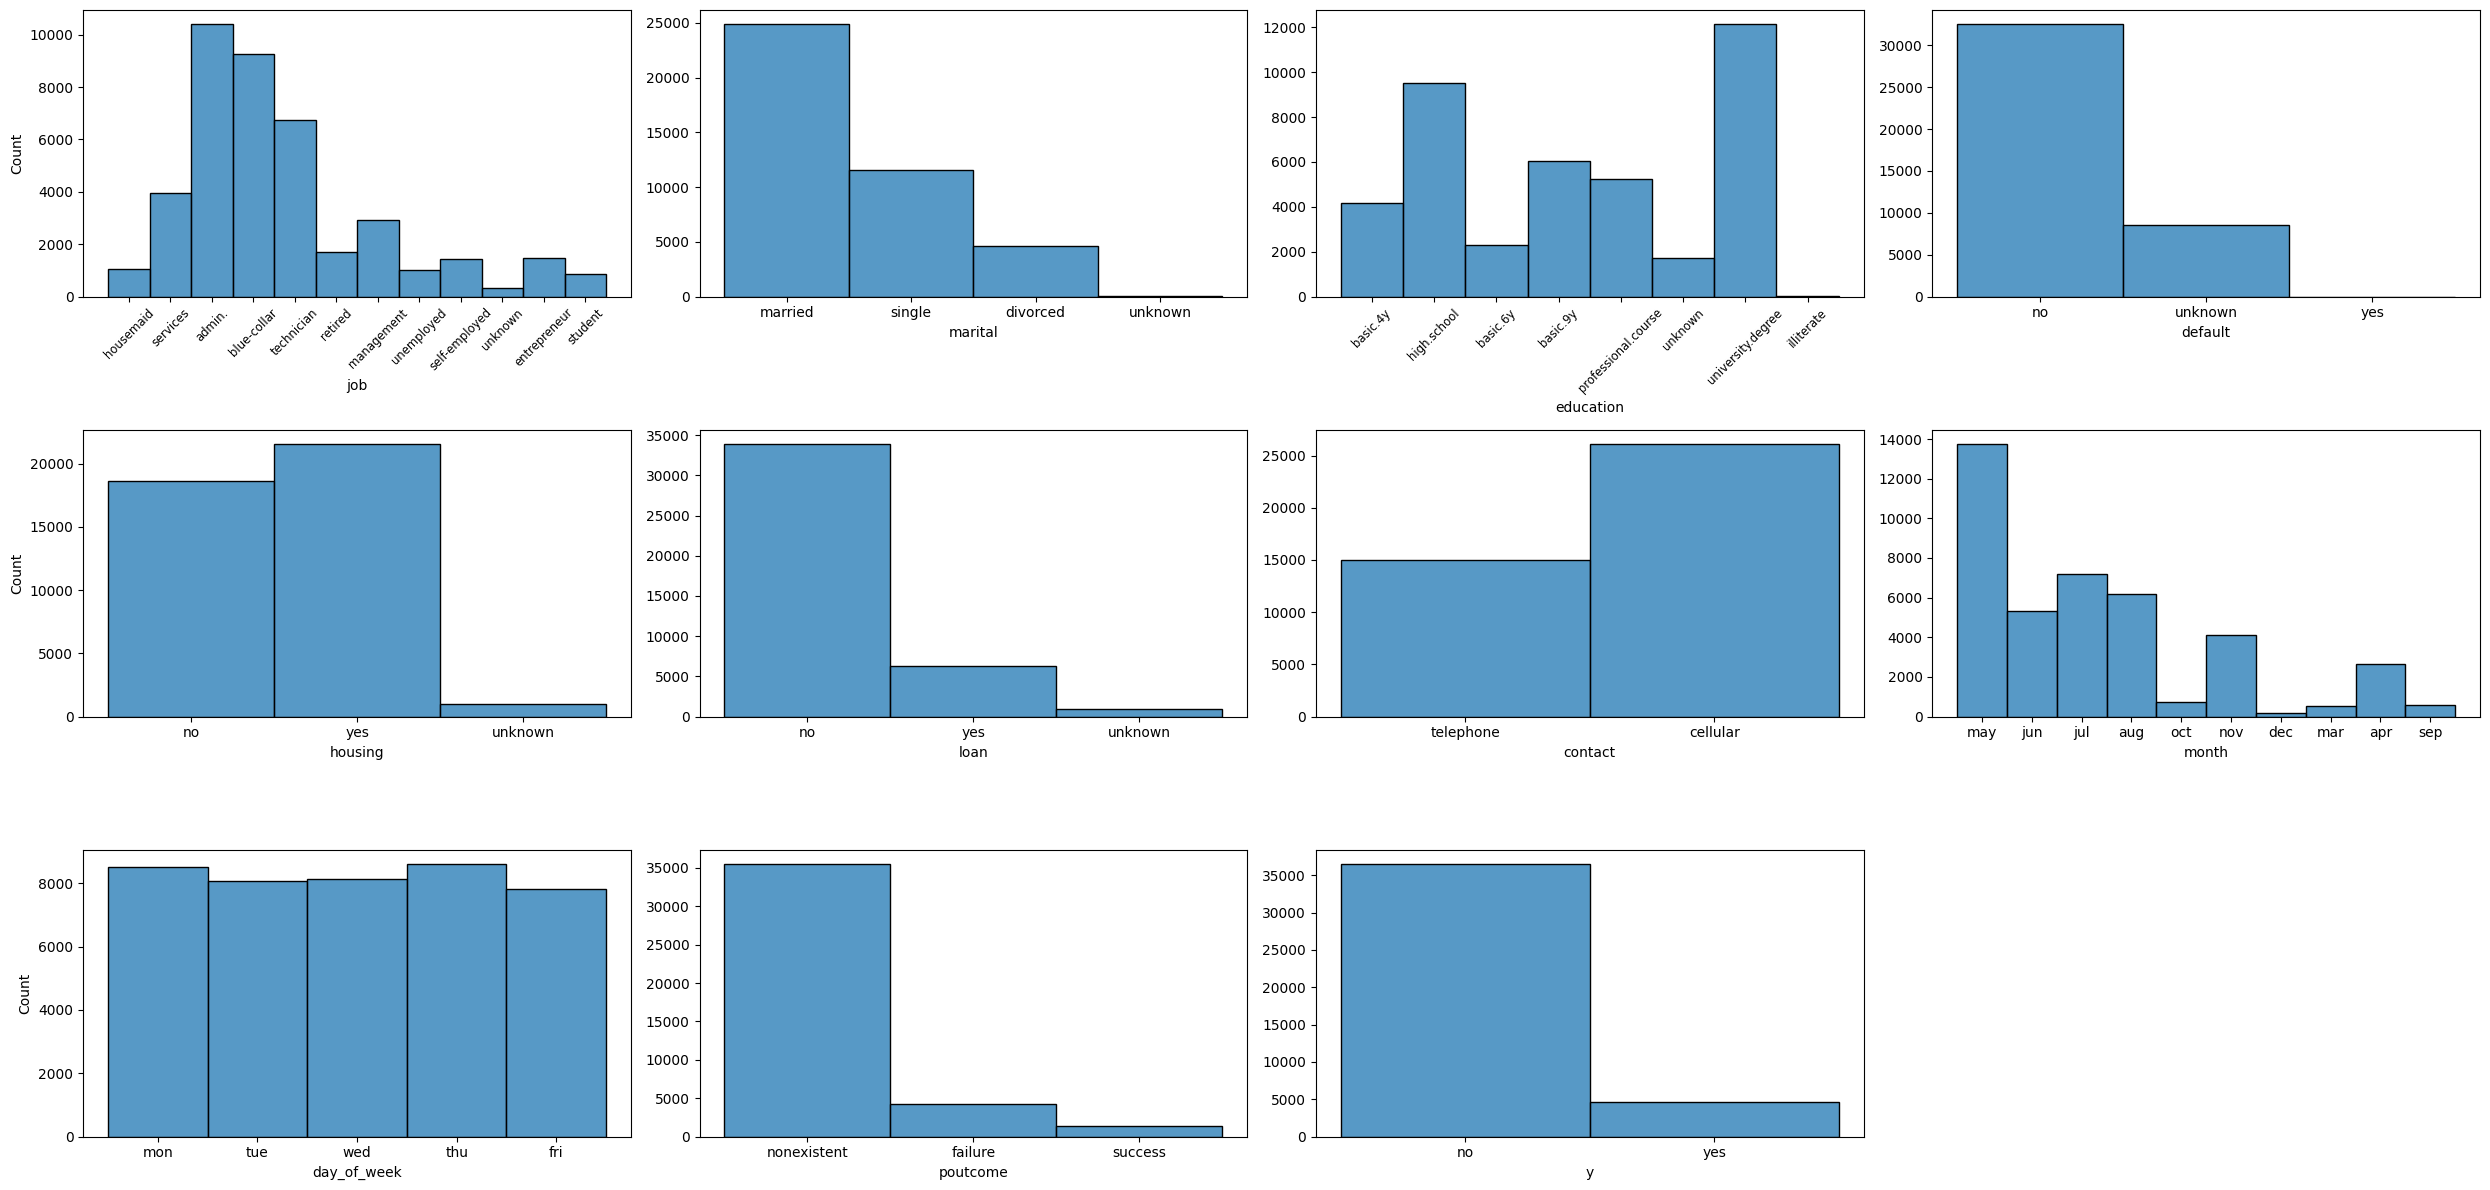

In [10]:
#Analisis univariado categorico
fig, axes = plt.subplots(3, 4, figsize=(25, 12))

# Crear histogramas con el DataFrame df_interim
sns.histplot(ax=axes[0, 0], data=df_interim, x='job')
axes[0, 0].tick_params(axis='x', rotation=45, labelsize='small')
sns.histplot(ax=axes[0, 1], data=df_interim, x='marital').set(ylabel=None)
sns.histplot(ax=axes[0, 2], data=df_interim, x='education').set(ylabel=None)
axes[0, 2].tick_params(axis='x', rotation=45, labelsize='small')
sns.histplot(ax=axes[0, 3], data=df_interim, x='default').set(ylabel=None)

sns.histplot(ax=axes[1, 0], data=df_interim, x='housing')
sns.histplot(ax=axes[1, 1], data=df_interim, x='loan').set(ylabel=None)
sns.histplot(ax=axes[1, 2], data=df_interim, x='contact').set(ylabel=None)
sns.histplot(ax=axes[1, 3], data=df_interim, x='month').set(ylabel=None)

sns.histplot(ax=axes[2, 0], data=df_interim, x='day_of_week')
sns.histplot(ax=axes[2, 1], data=df_interim, x='poutcome').set(ylabel=None)
sns.histplot(ax=axes[2, 2], data=df_interim, x='y').set(ylabel=None)

# Eliminar el último eje que no contiene datos
fig.delaxes(axes[2, 3])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Segun el grafico concluimos que las columnas irrelevantes para este estudio son:

- default: muy desbalanceada, l amayoria de los clientes tienen un 'no'.
- day_of_week: el dia en que se elige no tiene mucho peso a la hora de aceptar la oferta.
- poutcome: la mayoria de los registros estan en nonexisten, hay pocas observaciones en 'failure' y 'success'
- education: considere eliminarla, ya que no da informacion util.

In [11]:
df = df_interim.copy()
df.drop(['day_of_week', 'education','default','poutcome'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   housing         41176 non-null  object 
 4   loan            41176 non-null  object 
 5   contact         41176 non-null  object 
 6   month           41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   pdays           41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  emp.var.rate    41176 non-null  float64
 12  cons.price.idx  41176 non-null  float64
 13  cons.conf.idx   41176 non-null  float64
 14  euribor3m       41176 non-null  float64
 15  nremployed      41176 non-null  float64
 16  y               41176 non-null  object 
dtypes: float64(5), int64(5), object(7)
m

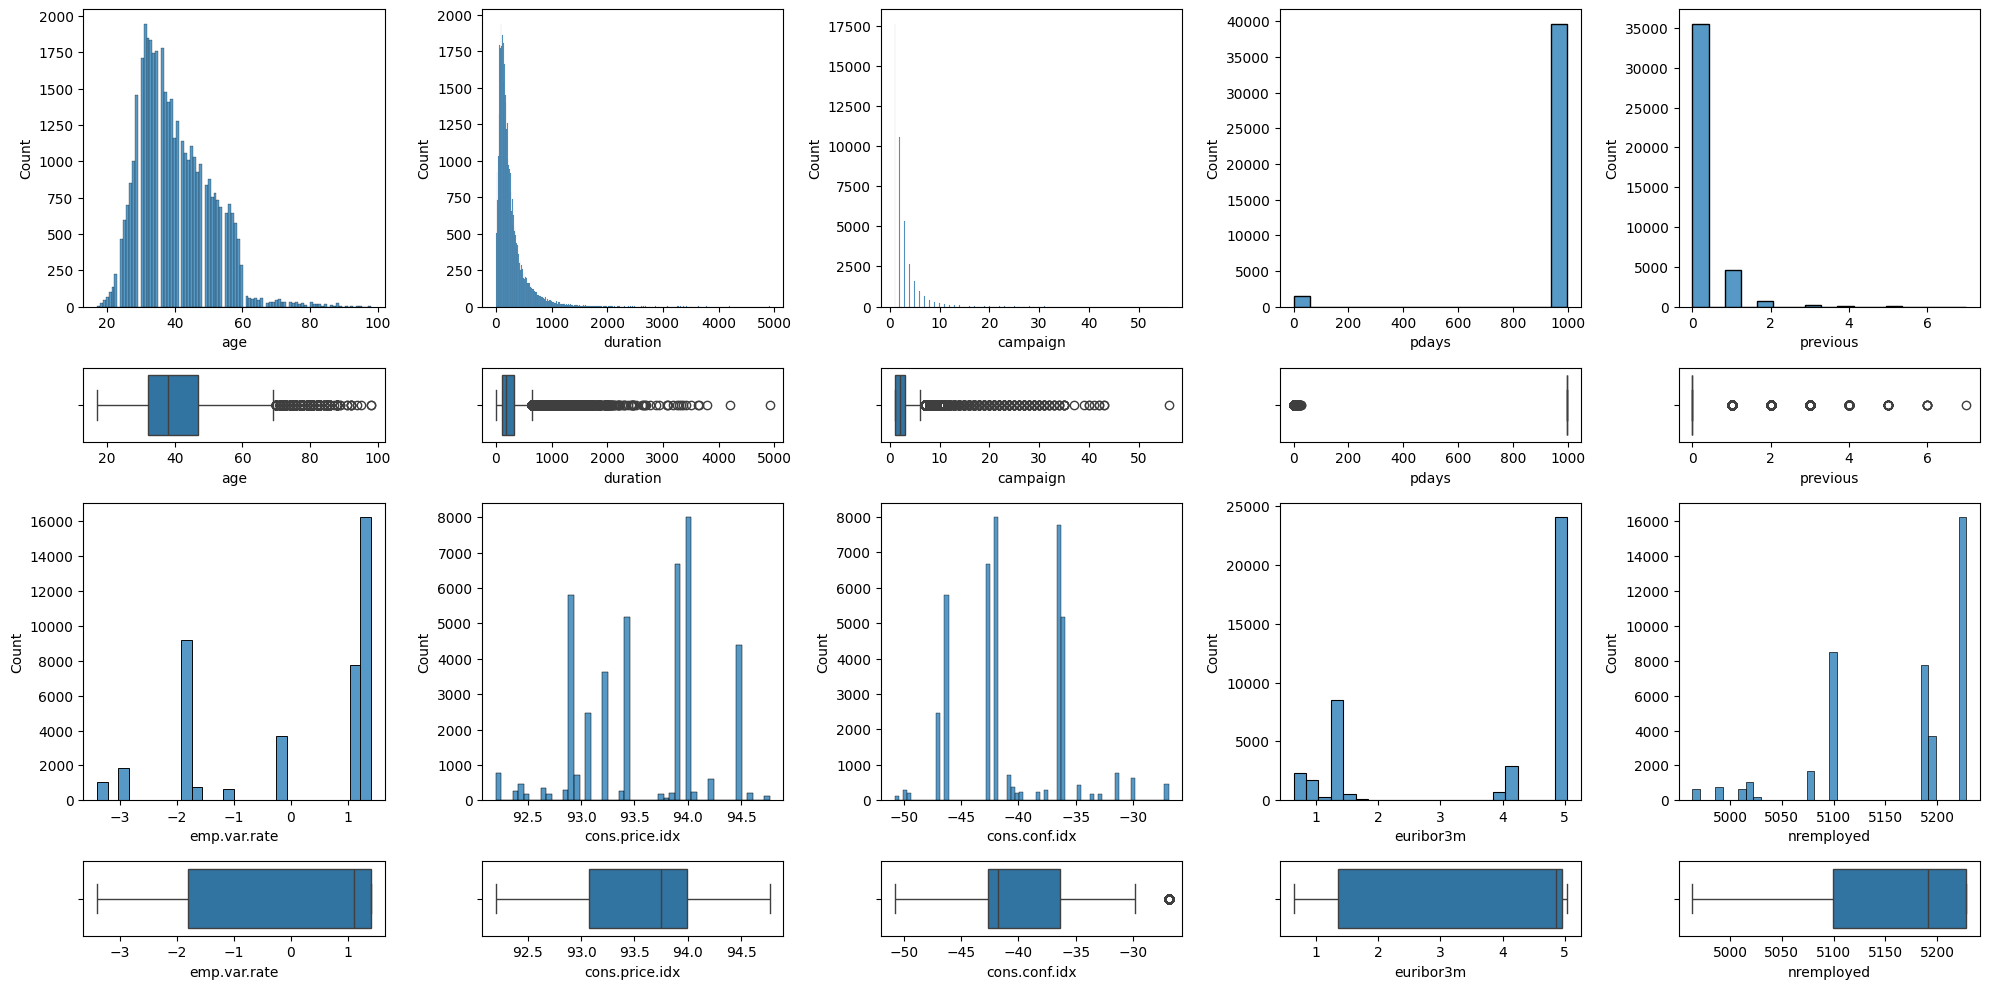

In [12]:
# Analisis univariado numerico 

fig, axis = plt.subplots(4, 5, figsize = (20, 10), gridspec_kw = {"height_ratios": [16, 4, 16, 4]})

sns.histplot(ax = axis[0, 0], data = df, x = "age")
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "duration")
sns.boxplot(ax = axis[1, 1], data = df, x = "duration")

sns.histplot(ax = axis[0, 2], data = df, x = "campaign")
sns.boxplot(ax = axis[1, 2], data = df, x = "campaign")

sns.histplot(ax = axis[0, 3], data = df, x = "pdays")
sns.boxplot(ax = axis[1, 3], data = df, x = "pdays")

sns.histplot(ax = axis[0, 4], data = df, x = "previous")
sns.boxplot(ax = axis[1, 4], data = df, x = "previous")

sns.histplot(ax = axis[2, 0], data = df, x = "emp.var.rate")
sns.boxplot(ax = axis[3, 0], data = df, x = "emp.var.rate")

sns.histplot(ax = axis[2, 1], data = df, x = "cons.price.idx")
sns.boxplot(ax = axis[3, 1], data = df, x = "cons.price.idx")

sns.histplot(ax = axis[2, 2], data = df, x = "cons.conf.idx")
sns.boxplot(ax = axis[3, 2], data = df, x = "cons.conf.idx")

sns.histplot(ax = axis[2, 3], data = df, x = "euribor3m")
sns.boxplot(ax = axis[3, 3], data = df, x = "euribor3m")

sns.histplot(ax = axis[2, 4], data = df, x = "nremployed")
sns.boxplot(ax = axis[3, 4], data = df, x = "nremployed")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


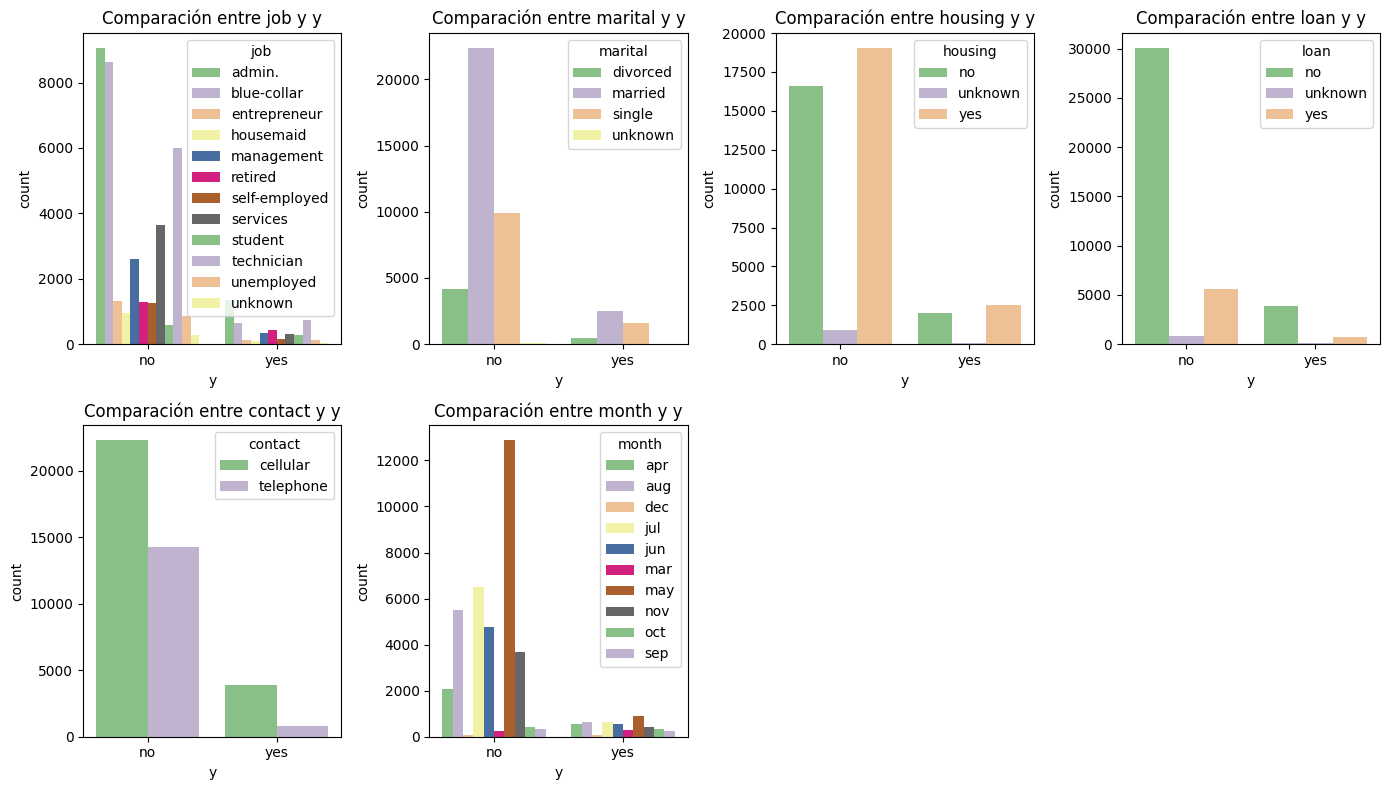

In [13]:
# Lista de variables categóricas seleccionadas
categorical_vars = ['job', 'marital', 'housing', 'loan', 'contact', 'month']

# Crear gráficos comparando cada variable categórica con la variable objetivo 'y'
fig, axes = plt.subplots(2, 4, figsize=(14, 8))  # Ajustar el tamaño de la figura
axes = axes.flatten()  # Aplanar los ejes para facilitar el uso

for i, var in enumerate(categorical_vars):
    sns.barplot(x='y', y='count', hue=var, data=df.groupby(['y', var]).size().reset_index(name='count'), ax=axes[i], palette='Accent')
    axes[i].set_title(f'Comparación entre {var} y y')

# Eliminar los últimos dos ejes que están vacíos
fig.delaxes(axes[6])
fig.delaxes(axes[7])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar la gráfica
plt.show()


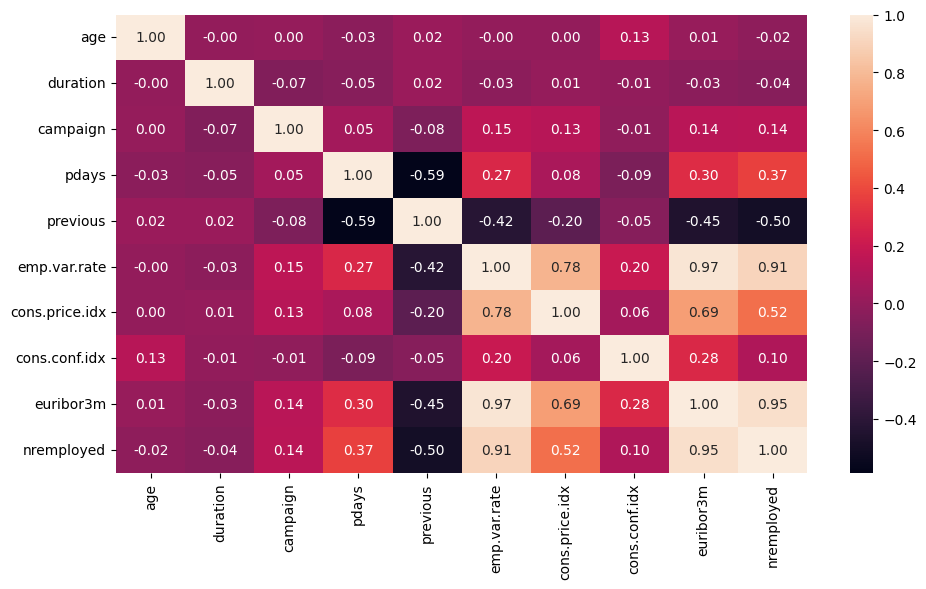

In [14]:
# Analisis multivariado numerico-numerico
fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot Layout
plt.show()

In [15]:
#MinMaxScaler

df["job_n"] = pd.factorize(df["job"])[0]
df["marital_n"] = pd.factorize(df["marital"])[0]
df["housing_n"] = pd.factorize(df["housing"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df["contact_n"] = pd.factorize(df["contact"])[0]
df["month_n"] = pd.factorize(df["month"])[0]
df["y_n"] = pd.factorize(df["y"])[0]

num_variables = ["job_n", "marital_n","housing_n", "loan_n", "contact_n", "month_n","age", "duration",
                  "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nremployed", "y_n"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index=df.index, columns=num_variables)
df_scal.head()




,job_n,marital_n,housing_n,loan_n,contact_n,month_n,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nremployed,y_n
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.0,0.0,0.0,0.0,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.5,0.0,0.0,0.0,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.0,0.0,0.0,0.0,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.0,0.5,0.0,0.0,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [16]:
# Selección de caracteristicas

X = df_scal.drop('y_n', axis=1)
y = df_scal['y_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selección de mejores caracteristicas usando SelectKBest
selection_model = SelectKBest(chi2, k=5)
selection_model.fit(X_train, y_train)

# Obtener las columnas seleccionadas
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_train.columns[ix])

# Mostrar las primeras filas de X_train_sel
X_train_sel.head()


,month_n,previous,emp.var.rate,euribor3m,nremployed
0,0.222222,0.0,1.000000,0.980503,1.000000
1,0.111111,0.0,1.000000,0.958966,1.000000
2,0.333333,0.0,1.000000,0.981410,1.000000
3,0.000000,0.0,0.937500,0.958059,0.859735
4,0.000000,0.0,0.333333,0.148946,0.512287


In [17]:
X_train_sel['y_n'] = list(y_train)
X_test_sel['y_n'] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [18]:
# Modelo de regresion logistica 


train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
accuracy_score(y_test, y_pred)

0.8811316172899466

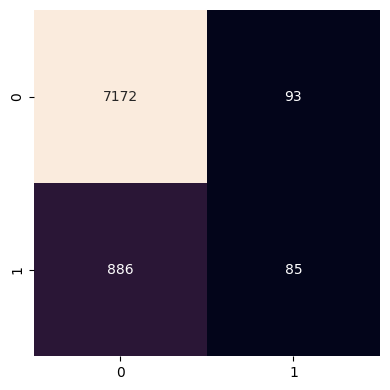

In [22]:
# Confusion matrix

bank_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (4, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Conclusiones:

True Negative (TN):  7172 son los casos en los que el modelo predijo negativo , la clase real también es negativa.

False negative (FN): 886  son los casos en los que el modelo predijo negativo, pero la clase real es positiva.

True positive (TP):  85  son los casos en los que el modelo predijo positivo y la clase real también es positiva.

False positive (FP): 93  son los casos en los que el modelo predijo positivo, pero la clase real es negativa.

In [23]:

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [24]:

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [25]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "lbfgs")
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [26]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:

accuracy_score(y_test, y_pred)

0.8828314715881496

In [29]:
# Random 

hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the random search
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(C=0.1), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [30]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': np.float64(0.03359818286283781)}


In [ ]:
# Reintentar entrenar el modelo con nuevos parametros 

model_grid = LogisticRegression(penalty = "l2", C = 0.03359818286283781, solver = "lbfgs")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8828314715881496